In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

---

**Рассмотрим уже знакомый нам датасет с фильмами номинантами на оскар.**

Предположим перед нами стоит задача построения модели предсказания вероятности взятия оскара тем или иным фильмом по известной информации из таблицы

In [3]:
oscars = pd.read_csv('sem_2_oscars_df.csv', index_col=0)

In [4]:
oscars

Film Oscar Year  \
0                         Wings    1927/28   
1                    7th Heaven    1927/28   
2                    The Racket    1927/28   
3           The Broadway Melody    1928/29   
4                         Alibi    1928/29   
..                          ...        ...   
566                        Mank       2020   
567                      Minari       2020   
568       Promising Young Woman       2020   
569              Sound of Metal       2020   
570  The Trial of the Chicago 7       2020   

                               Film Studio/Producer(s)    Award  \
0                                 Famous Players-Lasky   Winner   
1                                                  Fox  Nominee   
2                                    The Caddo Company  Nominee   
3                                  Metro-Goldwyn-Mayer   Winner   
4                                  Feature Productions  Nominee   
..                                                 ...      ...   
566      Ceán Chaffin, Eric Roth, and Douglas Urbanski  Nominee   
567                                       Christina Oh  Nominee   
568  Ben Browning, Ashley Fox, Emerald Fennell, and...  Nominee   
569              Bert Hamelinck and Sacha Ben Harroche  Nominee   
570                    Marc Platt and Stuart M. Besser  Nominee   

     Year of Release  Movie Time             Movie Genre  IMDB Rating  \
0               1927         144       Drama,Romance,War          7.5   
1               1927         110           Drama,Romance          7.7   
2               1928          84   Crime,Drama,Film-Noir          6.7   
3               1929         100   Drama,Musical,Romance          5.7   
4               1929          91    Action,Crime,Romance          5.8   
..               ...         ...                     ...          ...   
566             2020         131  Biography,Comedy,Drama          6.9   
567             2020         115                   Drama          7.5   
568             2020         113    Crime,Drama,Thriller          7.5   
569             2019         120             Drama,Music          7.8   
570             2020         129  Drama,History,Thriller          7.8   

    IMDB Votes                                         Movie Info  ...  \
0       12,221  With World War I afoot, David Armstrong (Richa...  ...   
1        3,439                                                NaN  ...   
2        1,257                                                NaN  ...   
3        6,890  Vaudeville sisters "Hank" (Bessie Love) and Qu...  ...   
4          765                                                NaN  ...   
..         ...                                                ...  ...   
566     65,380                                                NaN  ...   
567     57,976                                                NaN  ...   
568    122,269                                                NaN  ...   
569    102,807                                                NaN  ...   
570    156,283                                                NaN  ...   

    Tomatometer Status Tomatometer Rating Tomatometer Count Audience Status  \
0      Certified-Fresh               93.0              46.0         Upright   
1                  NaN                NaN               NaN             NaN   
2                  NaN                NaN               NaN             NaN   
3               Rotten               33.0              24.0         Spilled   
4                  NaN                NaN               NaN             NaN   
..                 ...                ...               ...             ...   
566                NaN                NaN               NaN             NaN   
567                NaN                NaN               NaN             NaN   
568                NaN                NaN               NaN             NaN   
569                NaN                NaN               NaN             NaN   
570                NaN            

In [5]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Film                              571 non-null    object 
 1   Oscar Year                        571 non-null    object 
 2   Film Studio/Producer(s)           571 non-null    object 
 3   Award                             571 non-null    object 
 4   Year of Release                   571 non-null    int64  
 5   Movie Time                        571 non-null    int64  
 6   Movie Genre                       571 non-null    object 
 7   IMDB Rating                       571 non-null    float64
 8   IMDB Votes                        571 non-null    object 
 9   Movie Info                        438 non-null    object 
 10  Genres                            439 non-null    object 
 11  Critic Consensus                  339 non-null    object 
 12  Content 

In [6]:
oscars.Award.unique()

array(['Winner', 'Nominee'], dtype=object)

То есть для каждого примера фильма с вышеописанными характеристиками мы бы хотели предсказывать с какой вероятностью поле `Award == Winner` 

---

В первую очередь взглянем на общую природу данных:

In [8]:
oscars.describe()

Year of Release  Movie Time  IMDB Rating  Tomatometer Rating  \
count       571.000000  571.000000   571.000000          439.000000   
mean       1973.357268  124.894921     7.570403           87.503417   
std          29.315738   26.322817     0.559652           11.690622   
min        1927.000000   66.000000     5.600000           29.000000   
25%        1944.000000  107.000000     7.300000           84.000000   
50%        1972.000000  121.000000     7.600000           91.000000   
75%        2001.000000  136.500000     7.900000           95.000000   
max        2021.000000  238.000000     9.300000          100.000000   

       Tomatometer Count  Audience Rating  Audience Count  \
count         439.000000       439.000000    4.390000e+02   
mean          110.697039        82.428246    5.154145e+05   
std           119.541406        10.927897    3.623107e+06   
min             5.000000        21.000000    6.000000e+00   
25%            25.000000        78.000000    6.637500e+03   
50%            54.000000        85.000000    3.716600e+04   
75%           199.000000        90.000000    1.255365e+05   
max           574.000000        98.000000    3.579764e+07   

       Tomatometer Top Critics Count  Tomatometer Fresh Critics Count  \
count                     439.000000                       439.000000   
mean                       21.861048                        98.471526   
std                        21.615492                       107.798554   
min                         0.000000                         3.000000   
25%                         5.000000                        21.500000   
50%                        11.000000                        49.000000   
75%                        45.000000                       163.500000   
max                        69.000000                       495.000000   

       Tomatometer Rotten Critics Count  
count                        439.000000  
mean                          12.275626  
std                           19.310232  
min                            0.000000  
25%                            2.000000  
50%                            5.000000  
75%                           15.000000  
max                          182.000000

Сразу заметим, что для некоторых фильмов существует несколько строк в таблице
Разберемся, что это за строки

In [15]:
values, counts = np.unique(oscars.Film, return_counts=True)
non_unique_films = values[counts > 1]

In [13]:
values[counts > 1]

array(['A Star Is Born', 'Cleopatra', 'Heaven Can Wait', 'Les Misérables',
       'Little Women', 'Mutiny on the Bounty', 'Romeo and Juliet'],
      dtype=object)

In [16]:
oscars[np.in1d(oscars.Film, non_unique_films)].sort_values('Film')

Film Oscar Year  \
79         A Star Is Born       1937   
552        A Star Is Born       2018   
38              Cleopatra       1934   
237             Cleopatra       1963   
132       Heaven Can Wait       1943   
312       Heaven Can Wait       1978   
56         Les Misérables       1935   
500        Les Misérables       2012   
31           Little Women    1932/33   
560          Little Women       2019   
48   Mutiny on the Bounty       1935   
233  Mutiny on the Bounty       1962   
65       Romeo and Juliet       1936   
264      Romeo and Juliet       1968   

                               Film Studio/Producer(s)    Award  \
79                     Selznick International Pictures  Nominee   
552  Bill Gerber, Bradley Cooper, and Lynette Howel...  Nominee   
38                                           Paramount  Nominee   
237                                      Walter Wanger  Nominee   
132                                   20th Century-Fox  Nominee   
312                                      Warren Beatty  Nominee   
56                                        20th Century  Nominee   
500  Tim Bevan, Eric Fellner, Debra Hayward, and Ca...  Nominee   
31                                           RKO Radio  Nominee   
560                                         Amy Pascal  Nominee   
48                                 Metro-Goldwyn-Mayer   Winner   
233                                    Aaron Rosenberg   Winner   
65                                 Metro-Goldwyn-Mayer  Nominee   
264          Anthony Havelock-Allan and John Brabourne  Nominee   

     Year of Release  Movie Time                Movie Genre  IMDB Rating  \
79              1937         111              Drama,Romance          7.3   
552             2018         136        Drama,Music,Romance          7.6   
38              1934         100    Biography,Drama,History          6.8   
237             1963         192    Biography,Drama,History          7.0   
132             1943         112       Comedy,Drama,Fantasy          7.4   
312             1978         101     Comedy,Fantasy,Romance          6.9   
56              1935         108      Drama,History,Romance          7.7   
500             2012         158      Drama,History,Musical          7.6   
31              1933         115       Drama,Family,Romance          7.2   
560             2019         135              Drama,Romance          7.8   
48              1935         132  Adventure,Biography,Drama          7.7   
233             1962         178    Adventure,Drama,History          7.2   
65              1936         125              Drama,Romance          6.5   
264             1968         138              Drama,Romance          7.6   

    IMDB Votes                                         Movie Info  ...  \
79       9,301  When a young actress (Janet Gaynor) arrives in...  ...   
552    354,157  Seasoned musician Jackson Maine discovers -- a...  ...   
38       3,678                                                NaN  ...   
237     31,027  "Cleopatra" is a lengthy, sprawling, spectacul...  ...   
132     10,272  Spoiled playboy Henry van Cleve (Don Ameche) d...  ...   
312     19,822  Joe Pendleton (Warren Beatty), quarterback for...  ...   
56       3,468                                                NaN  ...   
500    317,030  After 19 years as a prisoner, Jean Valjean (Hu...  ...   
31       6,778  The endearing saga of the March sisters -- Meg...  ...   
560    163,410                                                NaN  ...   
48      21,805  As the cruel captain of the HMS Bounty, a ship...  ...   
233     15,634  On a sea voyage to transport breadfruit to Jam...  ...   
65       1,910  In this classic Hollywood take on Shakespeare'...  ...   
264     30,500  In the Italian city of Verona, the Montague an...  ...   

    Tomatometer Status Tomatometer Rating Tomatometer Count Audience Status  \
79               Fresh              100.0              20.0         Upright   
552 

Как мы видим, несмотря на то, что названия у фильмов одинаковое - года выпуска разные, что успокаивает наши переживания на наличие каких-либо дублей в данных и позволяет работать со всеми строками как уникальными фильмами

---

In [17]:
oscars.head()

Film Oscar Year Film Studio/Producer(s)    Award  \
0                Wings    1927/28    Famous Players-Lasky   Winner   
1           7th Heaven    1927/28                     Fox  Nominee   
2           The Racket    1927/28       The Caddo Company  Nominee   
3  The Broadway Melody    1928/29     Metro-Goldwyn-Mayer   Winner   
4                Alibi    1928/29     Feature Productions  Nominee   

   Year of Release  Movie Time            Movie Genre  IMDB Rating IMDB Votes  \
0             1927         144      Drama,Romance,War          7.5     12,221   
1             1927         110          Drama,Romance          7.7      3,439   
2             1928          84  Crime,Drama,Film-Noir          6.7      1,257   
3             1929         100  Drama,Musical,Romance          5.7      6,890   
4             1929          91   Action,Crime,Romance          5.8        765   

                                          Movie Info  ... Tomatometer Status  \
0  With World War I afoot, David Armstrong (Richa...  ...    Certified-Fresh   
1                                                NaN  ...                NaN   
2                                                NaN  ...                NaN   
3  Vaudeville sisters "Hank" (Bessie Love) and Qu...  ...             Rotten   
4                                                NaN  ...                NaN   

  Tomatometer Rating Tomatometer Count Audience Status Audience Rating  \
0               93.0              46.0         Upright            78.0   
1                NaN               NaN             NaN             NaN   
2                NaN               NaN             NaN             NaN   
3               33.0              24.0         Spilled            21.0   
4                NaN               NaN             NaN             NaN   

  Audience Count Tomatometer Top Critics Count  \
0         3530.0                           9.0   
1            NaN                           NaN   
2            NaN                           NaN   
3         1813.0                           7.0   
4            NaN                           NaN   

  Tomatometer Fresh Critics Count Tomatometer Rotten Critics Count  \
0                            43.0                              3.0   
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             8.0                             16.0   
4                             NaN                              NaN   

                                Film ID  
0  2becf7d5-a3de-46ab-ae45-abdd6b588067  
1  19ed3295-a878-4fd2-8e60-5cd7b5f93dad  
2  3111c2d8-0908-4093-8ff3-99c89f2f2f08  
3  de063f3f-2d35-4e1c-8636-6eb4c16bd236  
4  609887c2-877c-43a4-b88c-e40e31096a98  

[5 rows x 29 columns]

In [9]:
oscars.describe(include='object')

Film Oscar Year Film Studio/Producer(s)    Award  \
count                    571        571                     571      571   
unique                   564         93                     378        2   
top     Mutiny on the Bounty       1935     Metro-Goldwyn-Mayer  Nominee   
freq                       2         12                      40      478   

          Movie Genre IMDB Votes  \
count             571        571   
unique            128        570   
top     Drama,Romance    147,893   
freq               62          2   

                                               Movie Info Genres  \
count                                                 438    439   
unique                                                438    107   
top     In May 1940, Germany advanced into France, tra...  Drama   
freq                                                    1     78   

                                         Critic Consensus Content Rating  \
count                                                 339            439   
unique                                                339              5   
top     Humphrey Bogart is superb as a domineering cap...              R   
freq                                                    1            138   

            Directors        Authors  \
count             437            437   
unique            262            397   
top     William Wyler  Ernest Lehman   
freq               11              5   

                                                   Actors  \
count                                                 439   
unique                                                439   
top     Katharine Hepburn, Ginger Rogers, Adolphe Menj...   
freq                                                    1   

       Original Release Date Streaming Release Date  Production Company  \
count                    439                    438                 439   
unique                   420                    214                 104   
top               1942-01-01             2012-04-16  Paramount Pictures   
freq                       3                     35                  33   

       Tomatometer Status Audience Status  \
count                 439             436   
unique                  3               2   
top       Certified-Fresh         Upright   
freq                  263             417   

                                     Film ID  
count                                    571  
unique                                   571  
top     111025ab-00c2-490a-8921-f298fe1a6006  
freq                                       1

In [10]:
oscars['Oscar Year'].unique()

array(['1927/28', '1928/29', '1929/30', '1930/31', '1931/32', '1932/33',
       '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941',
       '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949',
       '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

Заметим, что у нас есть несколько примеров фильмов, у которых год номинации парный.
Давайте, не умоляя общности, (в силу ежегодности проведения мероприятия) опустим вторую часть даты у этих примеров и приведем даты к одному формату

In [20]:
def func(x):
    return x ** 2

In [21]:
func(3)

9

In [22]:
a = lambda x: x ** 2

In [23]:
a(3)

9

In [18]:
def func(year_r):
    return year_r.split('/')[0]

oscars['Oscar Year'].apply(lambda year_r: year_r.split('/')[0])

0      1927
1      1927
2      1927
3      1928
4      1928
       ... 
566    2020
567    2020
568    2020
569    2020
570    2020
Name: Oscar Year, Length: 571, dtype: object

In [24]:
oscars['Oscar Year'] = oscars['Oscar Year'].apply(lambda year_r: year_r.split('/')[0])

In [25]:
oscars

Film Oscar Year  \
0                         Wings       1927   
1                    7th Heaven       1927   
2                    The Racket       1927   
3           The Broadway Melody       1928   
4                         Alibi       1928   
..                          ...        ...   
566                        Mank       2020   
567                      Minari       2020   
568       Promising Young Woman       2020   
569              Sound of Metal       2020   
570  The Trial of the Chicago 7       2020   

                               Film Studio/Producer(s)    Award  \
0                                 Famous Players-Lasky   Winner   
1                                                  Fox  Nominee   
2                                    The Caddo Company  Nominee   
3                                  Metro-Goldwyn-Mayer   Winner   
4                                  Feature Productions  Nominee   
..                                                 ...      ...   
566      Ceán Chaffin, Eric Roth, and Douglas Urbanski  Nominee   
567                                       Christina Oh  Nominee   
568  Ben Browning, Ashley Fox, Emerald Fennell, and...  Nominee   
569              Bert Hamelinck and Sacha Ben Harroche  Nominee   
570                    Marc Platt and Stuart M. Besser  Nominee   

     Year of Release  Movie Time             Movie Genre  IMDB Rating  \
0               1927         144       Drama,Romance,War          7.5   
1               1927         110           Drama,Romance          7.7   
2               1928          84   Crime,Drama,Film-Noir          6.7   
3               1929         100   Drama,Musical,Romance          5.7   
4               1929          91    Action,Crime,Romance          5.8   
..               ...         ...                     ...          ...   
566             2020         131  Biography,Comedy,Drama          6.9   
567             2020         115                   Drama          7.5   
568             2020         113    Crime,Drama,Thriller          7.5   
569             2019         120             Drama,Music          7.8   
570             2020         129  Drama,History,Thriller          7.8   

    IMDB Votes                                         Movie Info  ...  \
0       12,221  With World War I afoot, David Armstrong (Richa...  ...   
1        3,439                                                NaN  ...   
2        1,257                                                NaN  ...   
3        6,890  Vaudeville sisters "Hank" (Bessie Love) and Qu...  ...   
4          765                                                NaN  ...   
..         ...                                                ...  ...   
566     65,380                                                NaN  ...   
567     57,976                                                NaN  ...   
568    122,269                                                NaN  ...   
569    102,807                                                NaN  ...   
570    156,283                                                NaN  ...   

    Tomatometer Status Tomatometer Rating Tomatometer Count Audience Status  \
0      Certified-Fresh               93.0              46.0         Upright   
1                  NaN                NaN               NaN             NaN   
2                  NaN                NaN               NaN             NaN   
3               Rotten               33.0              24.0         Spilled   
4                  NaN                NaN               NaN             NaN   
..                 ...                ...               ...             ...   
566                NaN                NaN               NaN             NaN   
567                NaN                NaN               NaN             NaN   
568                NaN                NaN               NaN             NaN   
569                NaN                NaN               NaN             NaN   
570                NaN            

---

В качестве разминки мы обработали одну фичу
Давайте теперь подойдем к вопросу работы с данными чуть более системно

Разобьем факторы на разные группы и поработаем с ними отдельно

In [13]:
SIMPLE_CAT_FEATURES = [
    'Content Rating',
    'Tomatometer Status',
    'Audience Status',
]
CAT_FEATURES = [
    'Film Studio/Producer(s)',
    'Production Company',
]
MULTILABEL_FEATURES = [
    'Movie Genre',
    'Genres',
    'Directors',
    'Authors',
    'Actors',
]
TEXT_FEATURES = [
    'Film',
    'Movie Info',
    'Critic Consensus',
]
DATE_FEATURES = [
    'Oscar Year',
    'Year of Release',
    'Original Release Date',
    'Streaming Release Date',
]
DIGIT_FEATURES = [
    'Movie Time',
    'IMDB Rating',
    'IMDB Votes',
    'Tomatometer Rating',
    'Tomatometer Count',
    'Audience Rating',
    'Audience Count',
    'Tomatometer Top Critics Count',
    'Tomatometer Fresh Critics Count',
    'Tomatometer Rotten Critics Count',
]
# Auxiliary
AUX_FEATURES = [
    'Award',
    'Film ID',
]


# Плохой пример как не стоит проверять два множества на совпадение:
if (np.unique(
    SIMPLE_CAT_FEATURES
    + CAT_FEATURES
    + MULTILABEL_FEATURES
    + TEXT_FEATURES
    + DATE_FEATURES
    + DIGIT_FEATURES
    + AUX_FEATURES
) != np.unique(oscars.columns)).all():
    raise RuntimeError
    
# А не падает этот пример, потому что у np.unique есть гарантия на лексикографический порядок выданных значений
# но если вы уберете хотя бы одну колонку из списков выше, то забавно, что код упадет не по RuntimeError,
# а по экспешену в заголовке IF

### Simple Categorical Features

В первую очередь рассмотрим простой случай:


Категориальные факторы с очень маленьким числом значений

In [14]:
oscars[SIMPLE_CAT_FEATURES].describe(include='object')

Content Rating Tomatometer Status Audience Status
count             439                439             436
unique              5                  3               2
top                 R    Certified-Fresh         Upright
freq              138                263             417

In [15]:
oscars[SIMPLE_CAT_FEATURES]

Content Rating Tomatometer Status Audience Status
0            PG-13    Certified-Fresh         Upright
1              NaN                NaN             NaN
2              NaN                NaN             NaN
3               NR             Rotten         Spilled
4              NaN                NaN             NaN
..             ...                ...             ...
566            NaN                NaN             NaN
567            NaN                NaN             NaN
568            NaN                NaN             NaN
569            NaN                NaN             NaN
570            NaN                NaN             NaN

[571 rows x 3 columns]

Положим в качестве пропуска Yet Another категорию

Обзовем ее здесь и далее `UNK` (`Unknown`)

In [16]:
NAN_VAL = 'UNK'


oscars[SIMPLE_CAT_FEATURES] = oscars[SIMPLE_CAT_FEATURES].fillna(NAN_VAL)

In [17]:
oscars[SIMPLE_CAT_FEATURES].head()

Content Rating Tomatometer Status Audience Status
0          PG-13    Certified-Fresh         Upright
1            UNK                UNK             UNK
2            UNK                UNK             UNK
3             NR             Rotten         Spilled
4            UNK                UNK             UNK

---

In [18]:
def draw_cat_freqs(data, column):
    values, counts = np.unique(data[column], return_counts=True)
    
    plt.figure(figsize=(12, 8))
    plt.bar(values, counts, alpha=0.5)
    plt.grid()
    plt.title(f'{column} frequencies')

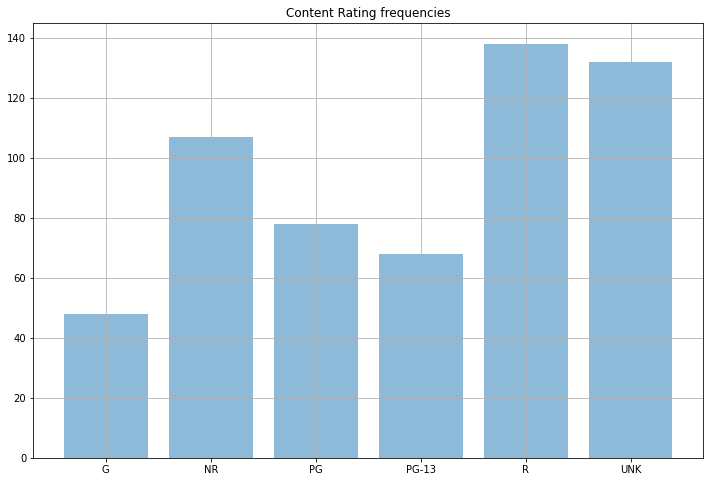

In [19]:
draw_cat_freqs(oscars, 'Content Rating')

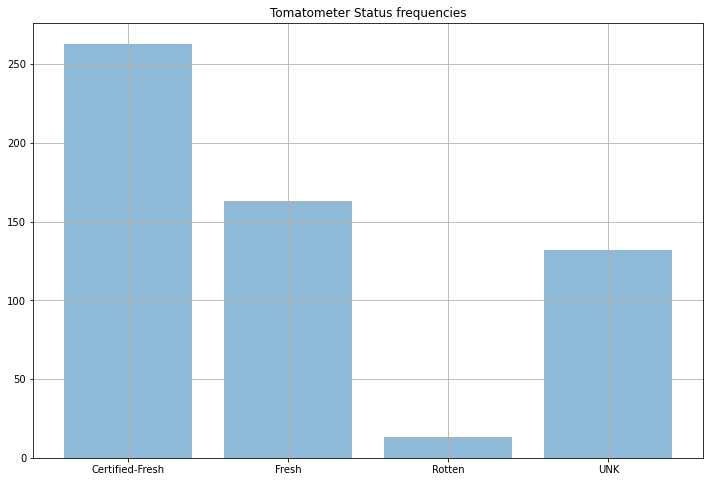

In [20]:
draw_cat_freqs(oscars, 'Tomatometer Status')

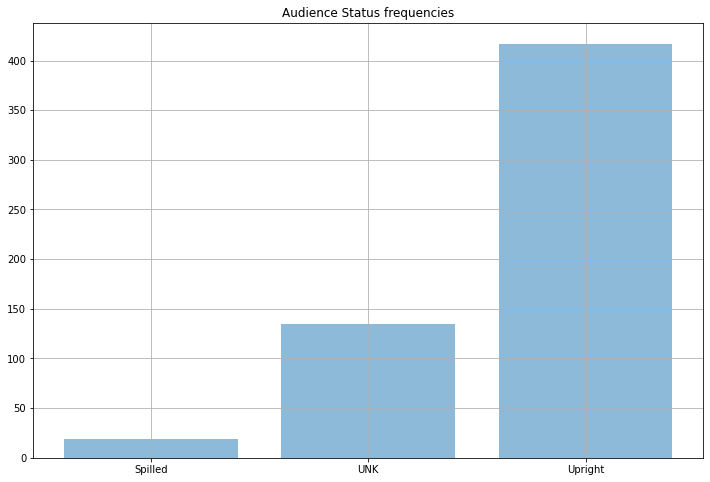

In [21]:
draw_cat_freqs(oscars, 'Audience Status')

### Categorical Features

В этом случае чуть сложнее

Кол-во уникальных значений у факторов такого же порядка сколько и строк в датасете
Давайте заполним пропуски и оставим только топ-несколько категорий
Чтобы после OneHot-кодирования не раздувать наш датасет

Более того, маломощные категория вряд ли являются информативными, поэтому лучше мы их все сгруппируем в одну категорию `_rest`

In [22]:
oscars[CAT_FEATURES].head()

Film Studio/Producer(s)      Production Company
0    Famous Players-Lasky                 Unknown
1                     Fox                     NaN
2       The Caddo Company                     NaN
3     Metro-Goldwyn-Mayer  MGM Home Entertainment
4     Feature Productions                     NaN

In [23]:
oscars[CAT_FEATURES].describe(include='object')

Film Studio/Producer(s)  Production Company
count                      571                 439
unique                     378                 104
top        Metro-Goldwyn-Mayer  Paramount Pictures
freq                        40                  33

In [24]:
oscars.loc[
    oscars['Production Company'] == 'Unknown',
    'Production Company'
] = NAN_VAL

In [25]:
oscars[CAT_FEATURES] = oscars[CAT_FEATURES].fillna(NAN_VAL)

---

In [26]:
def topk_freqs(data, column, k=20):
    values, counts = np.unique(data[column], return_counts=True)
    
    idxs = np.argsort(counts)[-k:]
    return values[idxs], counts[idxs]

    
def _draw_topk_freqs(values, counts, k=20, title=''):
    idxs = np.argsort(counts)[-k:]
    
    plt.figure(figsize=(12, 8))
    plt.bar(values[idxs], counts[idxs], alpha=0.5)
    plt.xticks(rotation=45)
    plt.grid()
    plt.title(title)
    
def draw_topk_freqs(data, column, k=20):
    values, counts = topk_freqs(data, column, k)
    
    _draw_topk_freqs(values, counts, k, title=f'Top{k} {column} frequencies')
    
    
def merge_lowfreq_cats(data, column, k=20, token='_rest'):
    values, counts = np.unique(data[column], return_counts=True)
    
    rest_values = values[np.argsort(counts)[:-k + 1]]
    data.loc[
        np.in1d(data[column], rest_values),
        column
    ] = token

In [27]:
REST_VAL = '_rest'

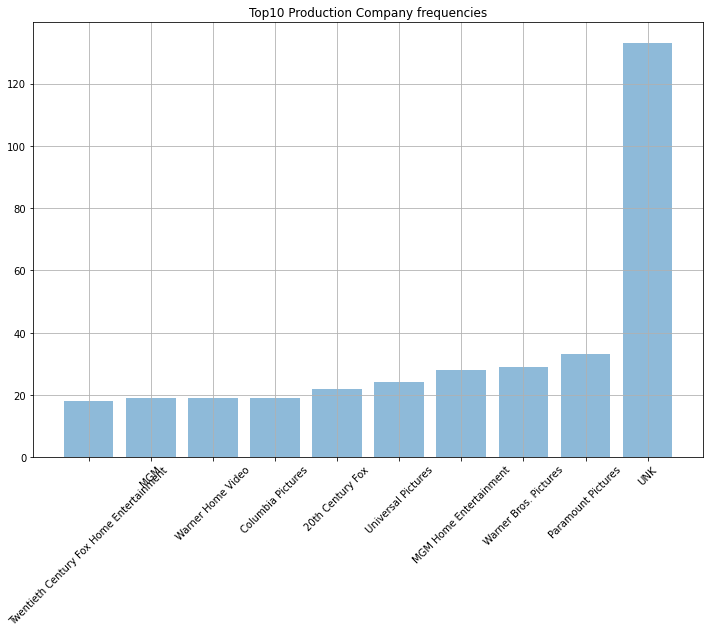

In [28]:
draw_topk_freqs(oscars, 'Production Company', 10)
merge_lowfreq_cats(oscars, 'Production Company', 10, REST_VAL)

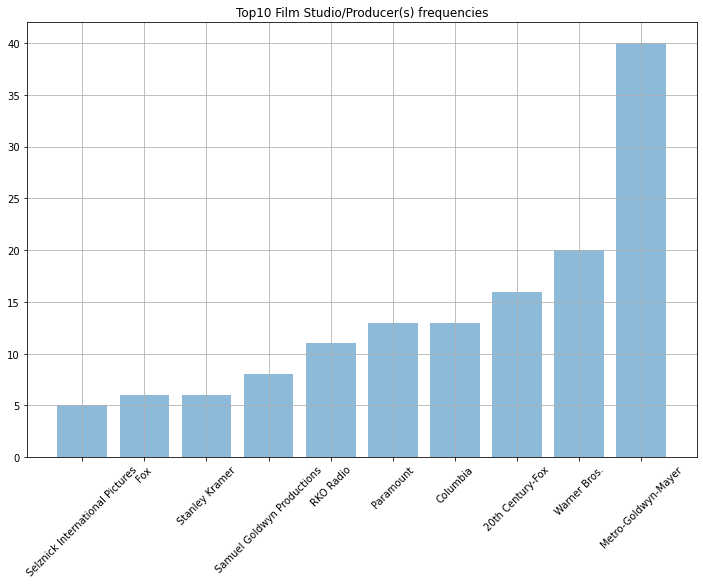

In [29]:
draw_topk_freqs(oscars, 'Film Studio/Producer(s)', 10)
merge_lowfreq_cats(oscars, 'Film Studio/Producer(s)', 10, REST_VAL)

In [30]:
oscars[CAT_FEATURES]

Film Studio/Producer(s)      Production Company
0                     _rest                     UNK
1                       Fox                     UNK
2                     _rest                     UNK
3       Metro-Goldwyn-Mayer  MGM Home Entertainment
4                     _rest                     UNK
..                      ...                     ...
566                   _rest                     UNK
567                   _rest                     UNK
568                   _rest                     UNK
569                   _rest                     UNK
570                   _rest                     UNK

[571 rows x 2 columns]

In [31]:
oscars[CAT_FEATURES].describe(include='object')

Film Studio/Producer(s) Production Company
count                      571                571
unique                      10                 10
top                      _rest              _rest
freq                       438                245

### Date Features

In [32]:
oscars[DATE_FEATURES]

Oscar Year  Year of Release Original Release Date Streaming Release Date
0         1927             1927            1927-08-12             2017-01-02
1         1927             1927                   NaN                    NaN
2         1927             1928                   NaN                    NaN
3         1928             1929            1929-02-01             2017-02-25
4         1928             1929                   NaN                    NaN
..         ...              ...                   ...                    ...
566       2020             2020                   NaN                    NaN
567       2020             2020                   NaN                    NaN
568       2020             2020                   NaN                    NaN
569       2020             2019                   NaN                    NaN
570       2020             2020                   NaN                    NaN

[571 rows x 4 columns]

In [33]:
oscars[DATE_FEATURES] = oscars[DATE_FEATURES].fillna(f'{NAN_VAL}-{NAN_VAL}-{NAN_VAL}')

In [34]:
oscars[DATE_FEATURES]

Oscar Year  Year of Release Original Release Date Streaming Release Date
0         1927             1927            1927-08-12             2017-01-02
1         1927             1927           UNK-UNK-UNK            UNK-UNK-UNK
2         1927             1928           UNK-UNK-UNK            UNK-UNK-UNK
3         1928             1929            1929-02-01             2017-02-25
4         1928             1929           UNK-UNK-UNK            UNK-UNK-UNK
..         ...              ...                   ...                    ...
566       2020             2020           UNK-UNK-UNK            UNK-UNK-UNK
567       2020             2020           UNK-UNK-UNK            UNK-UNK-UNK
568       2020             2020           UNK-UNK-UNK            UNK-UNK-UNK
569       2020             2019           UNK-UNK-UNK            UNK-UNK-UNK
570       2020             2020           UNK-UNK-UNK            UNK-UNK-UNK

[571 rows x 4 columns]

In [35]:
np.vstack(
    oscars['Original Release Date'].apply(lambda date: date.split('-')).values
)

array([['1927', '08', '12'],
       ['UNK', 'UNK', 'UNK'],
       ['UNK', 'UNK', 'UNK'],
       ...,
       ['UNK', 'UNK', 'UNK'],
       ['UNK', 'UNK', 'UNK'],
       ['UNK', 'UNK', 'UNK']], dtype='<U4')

In [36]:
oscars[['Month of Release', 'Day of Release']] = np.vstack(
    oscars['Original Release Date'].apply(lambda date: date.split('-')).values
)[:, 1:]


DATE_FEATURES += [
    'Month of Release',
    'Day of Release'
]

In [37]:
oscars[DATE_FEATURES]

Oscar Year  Year of Release Original Release Date Streaming Release Date  \
0         1927             1927            1927-08-12             2017-01-02   
1         1927             1927           UNK-UNK-UNK            UNK-UNK-UNK   
2         1927             1928           UNK-UNK-UNK            UNK-UNK-UNK   
3         1928             1929            1929-02-01             2017-02-25   
4         1928             1929           UNK-UNK-UNK            UNK-UNK-UNK   
..         ...              ...                   ...                    ...   
566       2020             2020           UNK-UNK-UNK            UNK-UNK-UNK   
567       2020             2020           UNK-UNK-UNK            UNK-UNK-UNK   
568       2020             2020           UNK-UNK-UNK            UNK-UNK-UNK   
569       2020             2019           UNK-UNK-UNK            UNK-UNK-UNK   
570       2020             2020           UNK-UNK-UNK            UNK-UNK-UNK   

    Month of Release Day of Release  
0                 08             12  
1                UNK            UNK  
2                UNK            UNK  
3                 02             01  
4                UNK            UNK  
..               ...            ...  
566              UNK            UNK  
567              UNK            UNK  
568              UNK            UNK  
569              UNK            UNK  
570              UNK            UNK  

[571 rows x 6 columns]

In [38]:
oscars[['Year of Streaming', 'Month of Streaming', 'Day of Streaming']] = np.vstack(
    oscars['Streaming Release Date'].apply(lambda date: date.split('-')).values
)


DATE_FEATURES += [
    'Year of Streaming',
    'Month of Streaming', 
    'Day of Streaming'
]

In [39]:
DATE_FEATURES.remove('Original Release Date')
DATE_FEATURES.remove('Streaming Release Date')

oscars.drop(['Original Release Date', 'Streaming Release Date'], axis=1, inplace=True)

In [40]:
oscars[DATE_FEATURES]

Oscar Year  Year of Release Month of Release Day of Release  \
0         1927             1927               08             12   
1         1927             1927              UNK            UNK   
2         1927             1928              UNK            UNK   
3         1928             1929               02             01   
4         1928             1929              UNK            UNK   
..         ...              ...              ...            ...   
566       2020             2020              UNK            UNK   
567       2020             2020              UNK            UNK   
568       2020             2020              UNK            UNK   
569       2020             2019              UNK            UNK   
570       2020             2020              UNK            UNK   

    Year of Streaming Month of Streaming Day of Streaming  
0                2017                 01               02  
1                 UNK                UNK              UNK  
2                 UNK                UNK              UNK  
3                2017                 02               25  
4                 UNK                UNK              UNK  
..                ...                ...              ...  
566               UNK                UNK              UNK  
567               UNK                UNK              UNK  
568               UNK                UNK              UNK  
569               UNK                UNK              UNK  
570               UNK                UNK              UNK  

[571 rows x 7 columns]

----

### Digit Features

Теперь нам необходимо обработать вещественные факторы и заодно посмотреть на их скоррелированность


Пропуски будем заполнять средним по столбцу
Более того, финально отцентрируемый и отнормируем факторы. Далее в курсы мы узнаем зачем это нужно делать

In [41]:
oscars[DIGIT_FEATURES]

Movie Time  IMDB Rating IMDB Votes  Tomatometer Rating  \
0           144          7.5     12,221                93.0   
1           110          7.7      3,439                 NaN   
2            84          6.7      1,257                 NaN   
3           100          5.7      6,890                33.0   
4            91          5.8        765                 NaN   
..          ...          ...        ...                 ...   
566         131          6.9     65,380                 NaN   
567         115          7.5     57,976                 NaN   
568         113          7.5    122,269                 NaN   
569         120          7.8    102,807                 NaN   
570         129          7.8    156,283                 NaN   

     Tomatometer Count  Audience Rating  Audience Count  \
0                 46.0             78.0          3530.0   
1                  NaN              NaN             NaN   
2                  NaN              NaN             NaN   
3                 24.0             21.0          1813.0   
4                  NaN              NaN             NaN   
..                 ...              ...             ...   
566                NaN              NaN             NaN   
567                NaN              NaN             NaN   
568                NaN              NaN             NaN   
569                NaN              NaN             NaN   
570                NaN              NaN             NaN   

     Tomatometer Top Critics Count  Tomatometer Fresh Critics Count  \
0                              9.0                             43.0   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              7.0                              8.0   
4                              NaN                              NaN   
..                             ...                              ...   
566                            NaN                              NaN   
567                            NaN                              NaN   
568                            NaN                              NaN   
569                            NaN                              NaN   
570                            NaN                              NaN   

     Tomatometer Rotten Critics Count  
0                                 3.0  
1                                 NaN  
2                                 NaN  
3                                16.0  
4                                 NaN  
..                                ...  
566                               NaN  
567                               NaN  
568                               NaN  
569                               NaN  
570                               NaN  

[571 rows x 10 columns]

In [42]:
oscars[DIGIT_FEATURES].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Movie Time                        571 non-null    int64  
 1   IMDB Rating                       571 non-null    float64
 2   IMDB Votes                        571 non-null    object 
 3   Tomatometer Rating                439 non-null    float64
 4   Tomatometer Count                 439 non-null    float64
 5   Audience Rating                   439 non-null    float64
 6   Audience Count                    439 non-null    float64
 7   Tomatometer Top Critics Count     439 non-null    float64
 8   Tomatometer Fresh Critics Count   439 non-null    float64
 9   Tomatometer Rotten Critics Count  439 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 49.1+ KB


In [43]:
oscars['IMDB Votes'] = oscars['IMDB Votes'].apply(lambda val: val.replace(',', '')).astype(np.float64)

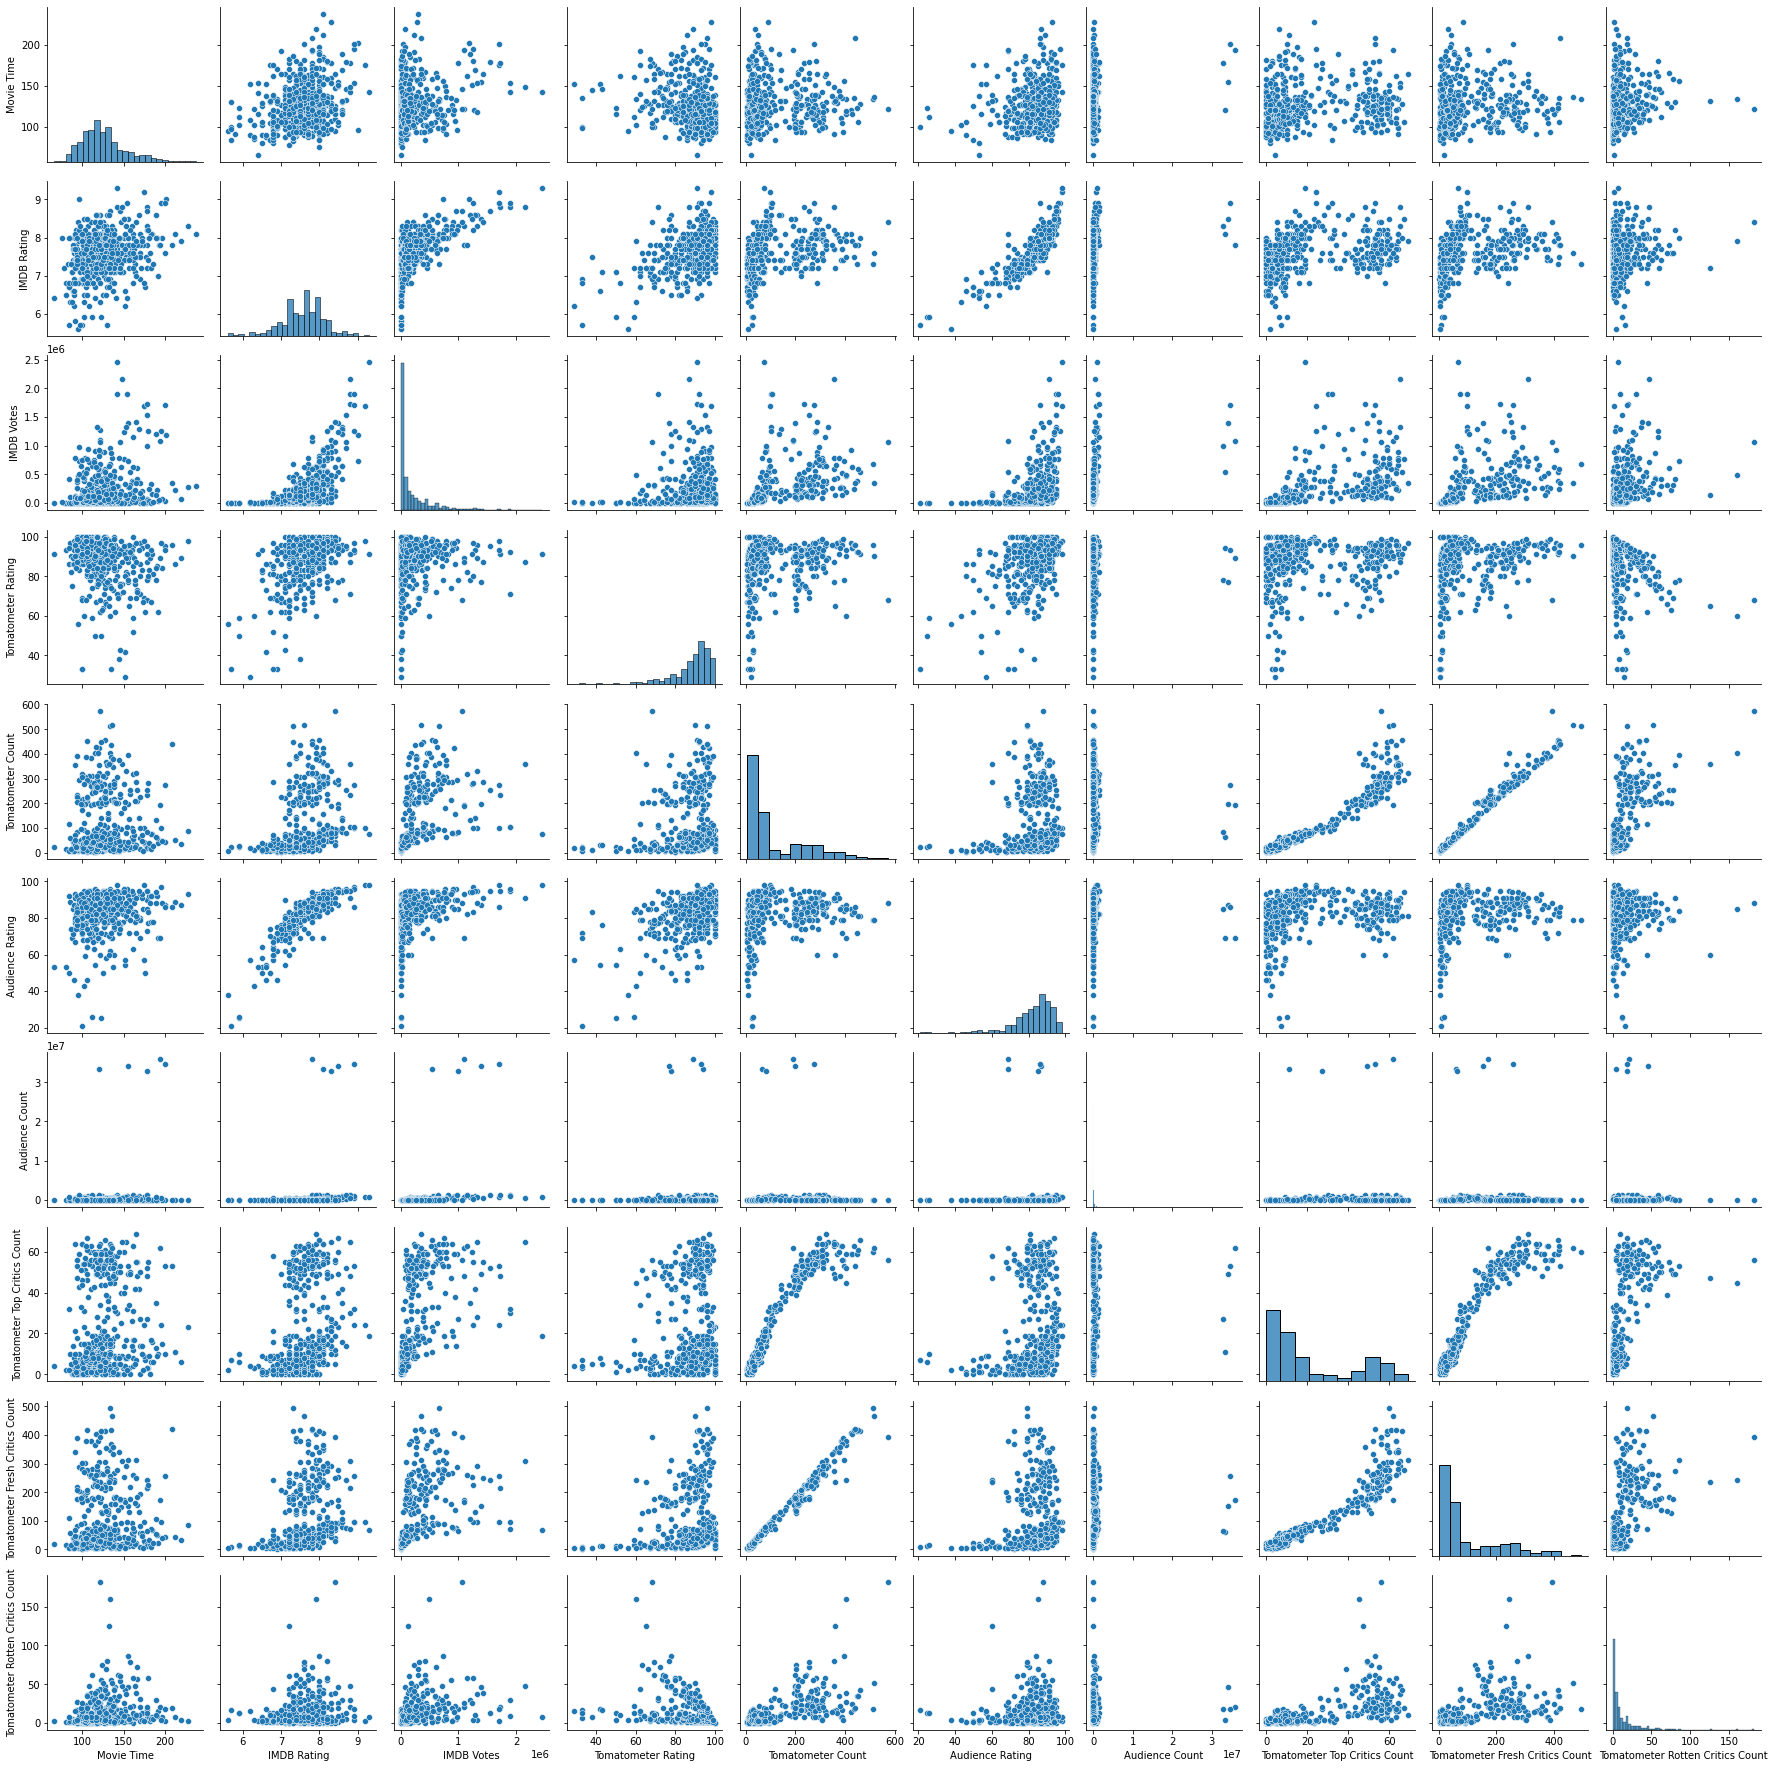

In [44]:
sns.pairplot(oscars[DIGIT_FEATURES ])

In [45]:
OUT_DIGIT_FEATURES = [
    'Tomatometer Count',
    'Audience Count',
]

oscars.drop(OUT_DIGIT_FEATURES, axis=1, inplace=True)
for col in OUT_DIGIT_FEATURES:
    DIGIT_FEATURES.remove(col)

In [46]:
oscars[DIGIT_FEATURES]

Movie Time  IMDB Rating  IMDB Votes  Tomatometer Rating  Audience Rating  \
0           144          7.5     12221.0                93.0             78.0   
1           110          7.7      3439.0                 NaN              NaN   
2            84          6.7      1257.0                 NaN              NaN   
3           100          5.7      6890.0                33.0             21.0   
4            91          5.8       765.0                 NaN              NaN   
..          ...          ...         ...                 ...              ...   
566         131          6.9     65380.0                 NaN              NaN   
567         115          7.5     57976.0                 NaN              NaN   
568         113          7.5    122269.0                 NaN              NaN   
569         120          7.8    102807.0                 NaN              NaN   
570         129          7.8    156283.0                 NaN              NaN   

     Tomatometer Top Critics Count  Tomatometer Fresh Critics Count  \
0                              9.0                             43.0   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              7.0                              8.0   
4                              NaN                              NaN   
..                             ...                              ...   
566                            NaN                              NaN   
567                            NaN                              NaN   
568                            NaN                              NaN   
569                            NaN                              NaN   
570                            NaN                              NaN   

     Tomatometer Rotten Critics Count  
0                                 3.0  
1                                 NaN  
2                                 NaN  
3                                16.0  
4                                 NaN  
..                                ...  
566                               NaN  
567                               NaN  
568                               NaN  
569                               NaN  
570                               NaN  

[571 rows x 8 columns]

In [47]:
oscars[DIGIT_FEATURES].mean(axis=0)

Movie Time                             124.894921
IMDB Rating                              7.570403
IMDB Votes                          208480.376532
Tomatometer Rating                      87.503417
Audience Rating                         82.428246
Tomatometer Top Critics Count           21.861048
Tomatometer Fresh Critics Count         98.471526
Tomatometer Rotten Critics Count        12.275626
dtype: float64

In [48]:
oscars[DIGIT_FEATURES].fillna(
    oscars[DIGIT_FEATURES].mean(axis=0)
)

Movie Time  IMDB Rating  IMDB Votes  Tomatometer Rating  Audience Rating  \
0           144          7.5     12221.0           93.000000        78.000000   
1           110          7.7      3439.0           87.503417        82.428246   
2            84          6.7      1257.0           87.503417        82.428246   
3           100          5.7      6890.0           33.000000        21.000000   
4            91          5.8       765.0           87.503417        82.428246   
..          ...          ...         ...                 ...              ...   
566         131          6.9     65380.0           87.503417        82.428246   
567         115          7.5     57976.0           87.503417        82.428246   
568         113          7.5    122269.0           87.503417        82.428246   
569         120          7.8    102807.0           87.503417        82.428246   
570         129          7.8    156283.0           87.503417        82.428246   

     Tomatometer Top Critics Count  Tomatometer Fresh Critics Count  \
0                         9.000000                        43.000000   
1                        21.861048                        98.471526   
2                        21.861048                        98.471526   
3                         7.000000                         8.000000   
4                        21.861048                        98.471526   
..                             ...                              ...   
566                      21.861048                        98.471526   
567                      21.861048                        98.471526   
568                      21.861048                        98.471526   
569                      21.861048                        98.471526   
570                      21.861048                        98.471526   

     Tomatometer Rotten Critics Count  
0                            3.000000  
1                           12.275626  
2                           12.275626  
3                           16.000000  
4                           12.275626  
..                                ...  
566                         12.275626  
567                         12.275626  
568                         12.275626  
569                         12.275626  
570                         12.275626  

[571 rows x 8 columns]

In [49]:
oscars[DIGIT_FEATURES] = oscars[DIGIT_FEATURES].fillna(
    oscars[DIGIT_FEATURES].mean(axis=0)
)

---

Посмотрим так же на распределение этих факторов в срезе `Award`

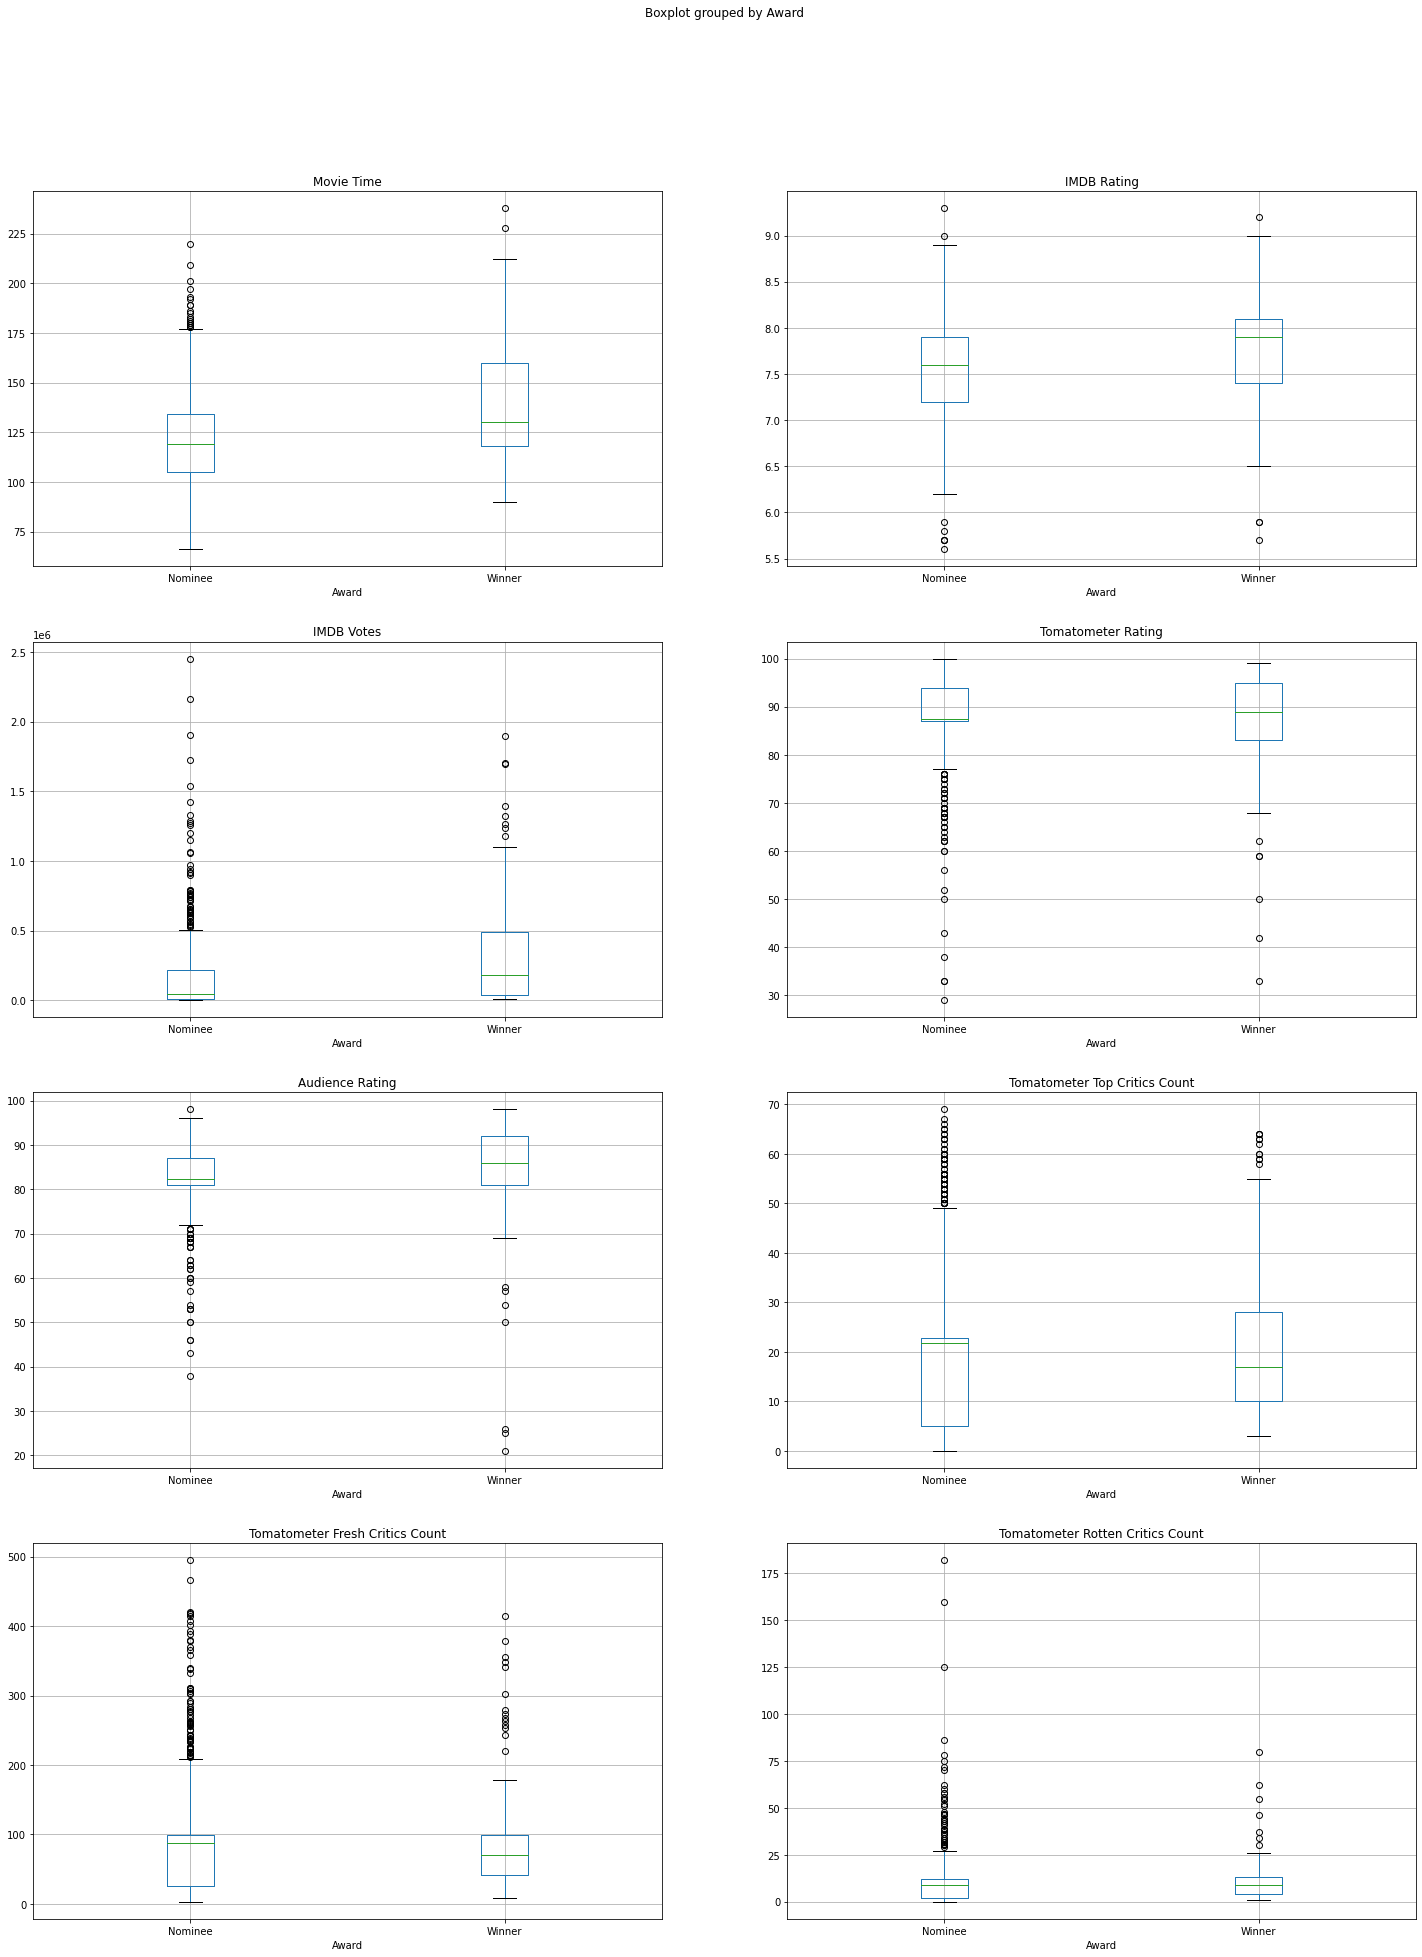

In [50]:
NROWS, NCOLS = 4, 2
plt.figure(figsize=(12 * NCOLS, 8 * NROWS))


for i, col in enumerate(DIGIT_FEATURES):
    ax = plt.subplot(NROWS, NCOLS, i + 1)
    oscars.boxplot(col, by='Award', ax=ax)

---

In [51]:
digit_mean = oscars[DIGIT_FEATURES].mean(axis=0)
digit_std = oscars[DIGIT_FEATURES].std(axis=0)

In [52]:
oscars[DIGIT_FEATURES] = (oscars[DIGIT_FEATURES] - digit_mean) / digit_std

In [53]:
oscars[DIGIT_FEATURES]

Movie Time  IMDB Rating  IMDB Votes  Tomatometer Rating  Audience Rating  \
0      0.725799    -0.125797   -0.573271        5.363590e-01        -0.462270   
1     -0.565856     0.231568   -0.598923        1.248031e-14         0.000000   
2     -1.553592    -1.555258   -0.605297        1.248031e-14         0.000000   
3     -0.945754    -3.342083   -0.588843       -5.318467e+00        -6.412567   
4     -1.287663    -3.163400   -0.606734        1.248031e-14         0.000000   
..          ...          ...         ...                 ...              ...   
566    0.231931    -1.197893   -0.417995        1.248031e-14         0.000000   
567   -0.375907    -0.125797   -0.439622        1.248031e-14         0.000000   
568   -0.451886    -0.125797   -0.251822        1.248031e-14         0.000000   
569   -0.185957     0.410250   -0.308671        1.248031e-14         0.000000   
570    0.155951     0.410250   -0.152468        1.248031e-14         0.000000   

     Tomatometer Top Critics Count  Tomatometer Fresh Critics Count  \
0                    -6.787527e-01                    -5.870263e-01   
1                    -1.312482e-15                     7.519304e-16   
2                    -1.312482e-15                     7.519304e-16   
3                    -7.843044e-01                    -9.574131e-01   
4                    -1.312482e-15                     7.519304e-16   
..                             ...                              ...   
566                  -1.312482e-15                     7.519304e-16   
567                  -1.312482e-15                     7.519304e-16   
568                  -1.312482e-15                     7.519304e-16   
569                  -1.312482e-15                     7.519304e-16   
570                  -1.312482e-15                     7.519304e-16   

     Tomatometer Rotten Critics Count  
0                       -5.479692e-01  
1                       -6.296430e-16  
2                       -6.296430e-16  
3                        2.200220e-01  
4                       -6.296430e-16  
..                                ...  
566                     -6.296430e-16  
567                     -6.296430e-16  
568                     -6.296430e-16  
569                     -6.296430e-16  
570                     -6.296430e-16  

[571 rows x 8 columns]

### Multilabel Features

Самая интересная часть - категориальные факторы с множественным вхождением


Заметим, что тут история аналогична категориальным факторам: маломощные категории несут мало информации и их можно скластеризовать в одну группу.


Давайте для каждого фактора выделим топK-встречаемых значений и будет для каждого примера в датасете поддерживать его маску вхождения в этот top.

In [54]:
oscars[MULTILABEL_FEATURES]

Movie Genre                              Genres  \
0         Drama,Romance,War        Action & Adventure, Classics   
1             Drama,Romance                                 NaN   
2     Crime,Drama,Film-Noir                                 NaN   
3     Drama,Musical,Romance  Musical & Performing Arts, Romance   
4      Action,Crime,Romance                                 NaN   
..                      ...                                 ...   
566  Biography,Comedy,Drama                                 NaN   
567                   Drama                                 NaN   
568    Crime,Drama,Thriller                                 NaN   
569             Drama,Music                                 NaN   
570  Drama,History,Thriller                                 NaN   

           Directors                                        Authors  \
0    William Wellman                  Hope Loring, Louis D. Lighton   
1                NaN                                            NaN   
2                NaN                                            NaN   
3     Harry Beaumont  James Gleason, Norman Houston, Sarah Y. Mason   
4                NaN                                            NaN   
..               ...                                            ...   
566              NaN                                            NaN   
567              NaN                                            NaN   
568              NaN                                            NaN   
569              NaN                                            NaN   
570              NaN                                            NaN   

                                                Actors  
0    Clara Bow, Charles 'Buddy' Rogers, Richard Arl...  
1                                                  NaN  
2                                                  NaN  
3    Anita Page, Bessie Love, Charles King, Jed Pro...  
4                                                  NaN  
..                                                 ...  
566                                                NaN  
567                                                NaN  
568                                                NaN  
569                                                NaN  
570                                                NaN  

[571 rows x 5 columns]

In [55]:
def multilabel_splitter(line, sep=','):
    if type(line) != str:
        return list()
    
    line = line.strip()
    return [val.strip() for val in line.split(sep)]


def process_multilabel_column(data, column, k=20, sep=','):
    values = np.hstack(data[column].apply(lambda line: multilabel_splitter(line, sep)).values)
    values, counts = np.unique(values, return_counts=True)
    
    _draw_topk_freqs(values, counts, k, f'Top{k} {column} frequencies')
    top_values = values[np.argsort(counts)][-k:]
    
    multilabel_columns = [column +'  | ' + col for col in top_values]
    data[multilabel_columns] = np.vstack(data[column].apply(
        lambda line: np.in1d(top_values, multilabel_splitter(line, sep))
    ).values)
    return multilabel_columns

---

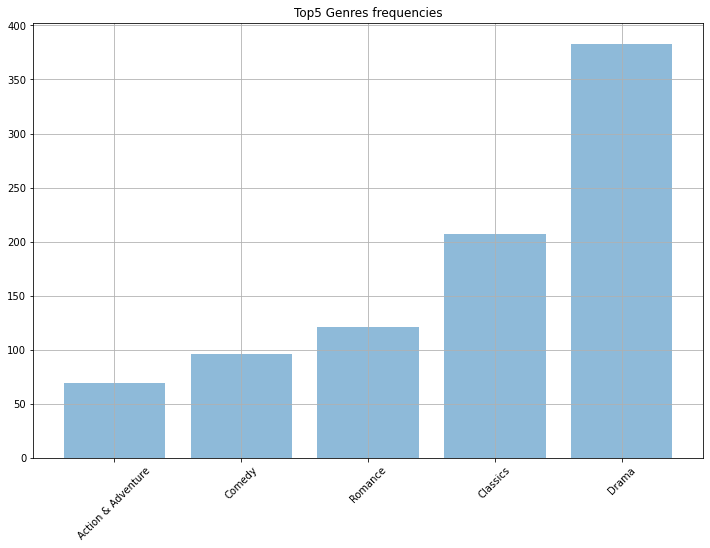

In [56]:
genres_cols = process_multilabel_column(oscars, 'Genres', 5)

MULTILABEL_FEATURES += genres_cols
MULTILABEL_FEATURES.remove('Genres')
oscars.drop('Genres', axis=1, inplace=True)

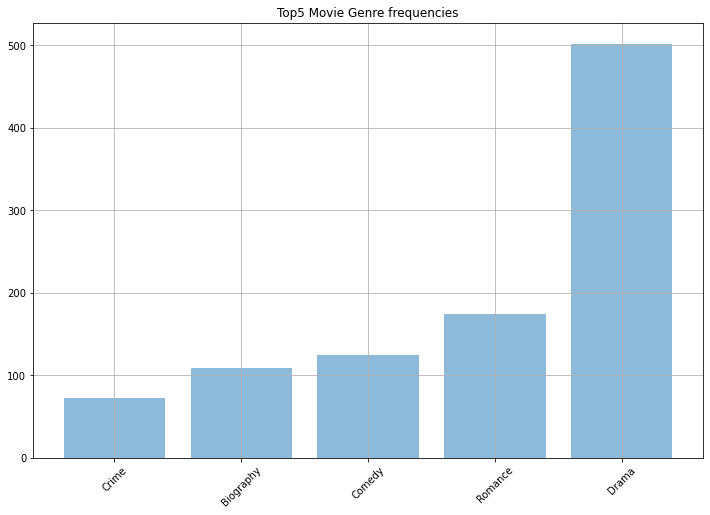

In [57]:
genres_cols = process_multilabel_column(oscars, 'Movie Genre', 5)

MULTILABEL_FEATURES += genres_cols
MULTILABEL_FEATURES.remove('Movie Genre')
oscars.drop('Movie Genre', axis=1, inplace=True)

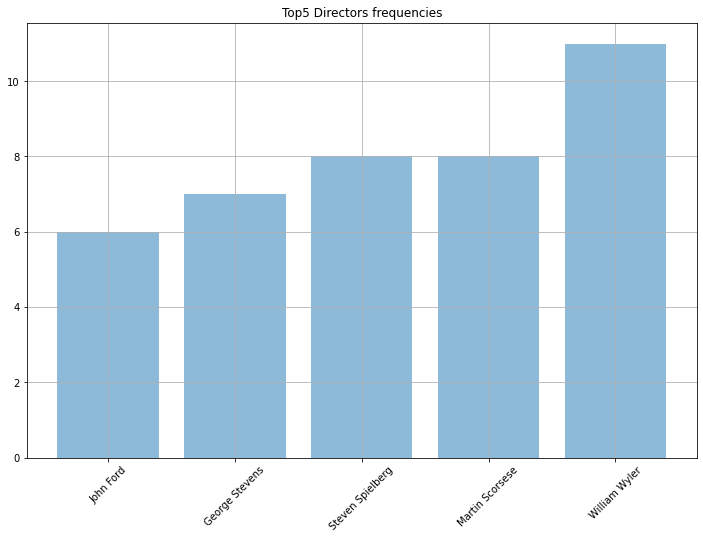

In [58]:
cols = process_multilabel_column(oscars, 'Directors', 5)

MULTILABEL_FEATURES += cols
MULTILABEL_FEATURES.remove('Directors')
oscars.drop('Directors', axis=1, inplace=True)

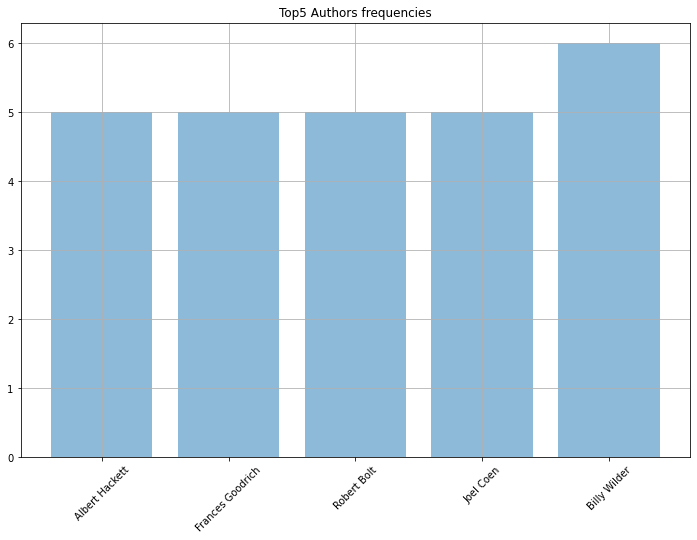

In [59]:
cols = process_multilabel_column(oscars, 'Authors', 5)

MULTILABEL_FEATURES += cols
MULTILABEL_FEATURES.remove('Authors')
oscars.drop('Authors', axis=1, inplace=True)

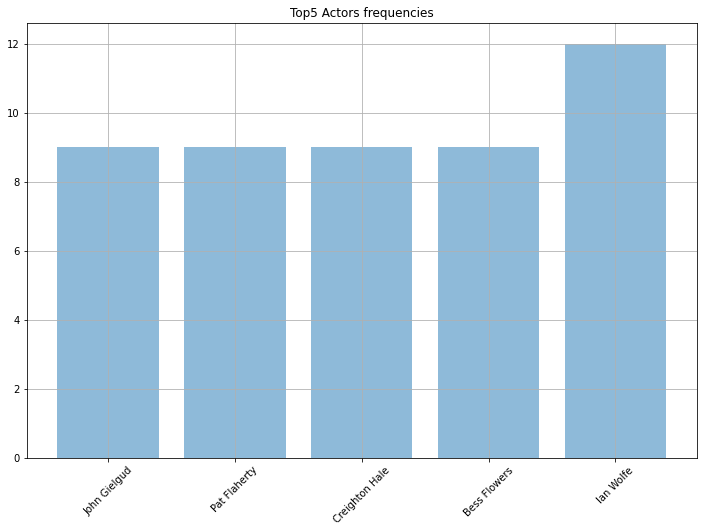

In [60]:
cols = process_multilabel_column(oscars, 'Actors', 5)

MULTILABEL_FEATURES += cols
MULTILABEL_FEATURES.remove('Actors')
oscars.drop('Actors', axis=1, inplace=True)

In [61]:
MULTILABEL_FEATURES

['Genres  | Action & Adventure',
 'Genres  | Comedy',
 'Genres  | Romance',
 'Genres  | Classics',
 'Genres  | Drama',
 'Movie Genre  | Crime',
 'Movie Genre  | Biography',
 'Movie Genre  | Comedy',
 'Movie Genre  | Romance',
 'Movie Genre  | Drama',
 'Directors  | John Ford',
 'Directors  | George Stevens',
 'Directors  | Steven Spielberg',
 'Directors  | Martin Scorsese',
 'Directors  | William Wyler',
 'Authors  | Albert Hackett',
 'Authors  | Frances Goodrich',
 'Authors  | Robert Bolt',
 'Authors  | Joel Coen',
 'Authors  | Billy Wilder',
 'Actors  | John Gielgud',
 'Actors  | Pat Flaherty',
 'Actors  | Creighton Hale',
 'Actors  | Bess Flowers',
 'Actors  | Ian Wolfe']

In [62]:
oscars[MULTILABEL_FEATURES]

Genres  | Action & Adventure  Genres  | Comedy  Genres  | Romance  \
0                            True             False              False   
1                           False             False              False   
2                           False             False              False   
3                           False             False               True   
4                           False             False              False   
..                            ...               ...                ...   
566                         False             False              False   
567                         False             False              False   
568                         False             False              False   
569                         False             False              False   
570                         False             False              False   

     Genres  | Classics  Genres  | Drama  Movie Genre  | Crime  \
0                  True            False                 False   
1                 False            False                 False   
2                 False            False                  True   
3                 False            False                 False   
4                 False            False                  True   
..                  ...              ...                   ...   
566               False            False                 False   
567               False            False                 False   
568               False            False                  True   
569               False            False                 False   
570               False            False                 False   

     Movie Genre  | Biography  Movie Genre  | Comedy  Movie Genre  | Romance  \
0                       False                  False                    True   
1                       False                  False                    True   
2                       False                  False                   False   
3                       False                  False                    True   
4                       False                  False                    True   
..                        ...                    ...                     ...   
566                      True                   True                   False   
567                     False                  False                   False   
568                     False                  False                   False   
569                     False                  False                   False   
570                     False                  False                   False   

     Movie Genre  | Drama  ...  Authors  | Albert Hackett  \
0                    True  ...                      False   
1                    True  ...                      False   
2                    True  ...                      False   
3                    True  ...                      False   
4                   False  ...                      False   
..                    ...  ...                        ...   
566                  True  ...                      False   
567                  True  ...                      False   
568                  True  ...                      False   
569                  True  ...                      False   
570                  True  ...                      False   

     Authors  | Frances Goodrich  Authors  | Robert Bolt  \
0                          False                   False   
1                          False                   False   
2                          False                   False   
3                          False                   False   
4                          False                   False   
..                           ...                     ...   
566                        False                   False   
567                        False                   False   
568                        False                   False   
569                        Fa

---

Таким образом, мы свели наш исходный сырой датасет к работоспособному виду

Единственное, что осталось не тронутым - это текстовые факторы и `Film ID`

Обработка текстовых факторов несколько выходит за рамки этого курса, поэтому в данном семинаре мы их просто опустим
А любые айдишники - это просто некоторый уникальный хэш сэмпла датасета, который только мешает обучению моделей машинного обучения. Так как склоняет их к меморизации выборки, вместо построения обобщений

In [64]:
oscars

Film Oscar Year Film Studio/Producer(s)    Award  \
0                         Wings       1927                   _rest   Winner   
1                    7th Heaven       1927                     Fox  Nominee   
2                    The Racket       1927                   _rest  Nominee   
3           The Broadway Melody       1928     Metro-Goldwyn-Mayer   Winner   
4                         Alibi       1928                   _rest  Nominee   
..                          ...        ...                     ...      ...   
566                        Mank       2020                   _rest  Nominee   
567                      Minari       2020                   _rest  Nominee   
568       Promising Young Woman       2020                   _rest  Nominee   
569              Sound of Metal       2020                   _rest  Nominee   
570  The Trial of the Chicago 7       2020                   _rest  Nominee   

     Year of Release  Movie Time  IMDB Rating  IMDB Votes  \
0               1927    0.725799    -0.125797   -0.573271   
1               1927   -0.565856     0.231568   -0.598923   
2               1928   -1.553592    -1.555258   -0.605297   
3               1929   -0.945754    -3.342083   -0.588843   
4               1929   -1.287663    -3.163400   -0.606734   
..               ...         ...          ...         ...   
566             2020    0.231931    -1.197893   -0.417995   
567             2020   -0.375907    -0.125797   -0.439622   
568             2020   -0.451886    -0.125797   -0.251822   
569             2019   -0.185957     0.410250   -0.308671   
570             2020    0.155951     0.410250   -0.152468   

                                            Movie Info  \
0    With World War I afoot, David Armstrong (Richa...   
1                                                  NaN   
2                                                  NaN   
3    Vaudeville sisters "Hank" (Bessie Love) and Qu...   
4                                                  NaN   
..                                                 ...   
566                                                NaN   
567                                                NaN   
568                                                NaN   
569                                                NaN   
570                                                NaN   

                                      Critic Consensus  ...  \
0    Subsequent war epics may have borrowed heavily...  ...   
1                                                  NaN  ...   
2                                                  NaN  ...   
3    The Broadway Melody is interesting as an examp...  ...   
4                                                  NaN  ...   
..                                                 ...  ...   
566                                                NaN  ...   
567                                                NaN  ...   
568                                                NaN  ...   
569                                                NaN  ...   
570                                                NaN  ...   

    Authors  | Albert Hackett Authors  | Frances Goodrich  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   
..                        ...                         ...   
566                     False                       False   
567                     False                       False   
568                     False                       False   
569                     False                       False   
570                     False                       False   

    Authors  | Robert Bolt  Authors  | Joel Coen Authors  | Billy Wilder  \
0                    False                 False                   False   
1     